In [1]:
import pandas as pd
weather = pd.read_csv("weather_report.csv", index_col="DATE")

In [2]:
weather

,STATION,NAME,AWND,FMTM,PGTM,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WDF2,WDF5,WSF2,WSF5,WT01,WT02,WT03,WT08
DATE,,,,,,,,,,,,,,,,,,,,
2000-01-01,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",2.91,1731.0,1730.0,0.00,NaN,NaN,66.0,78.0,54.0,NaN,90.0,100.0,14.1,16.1,NaN,NaN,NaN,NaN
2000-01-02,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",4.25,1537.0,1539.0,0.00,NaN,NaN,68.0,79.0,57.0,NaN,80.0,80.0,15.0,16.1,NaN,NaN,NaN,NaN
2000-01-03,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",5.37,1321.0,1114.0,0.01,NaN,NaN,68.0,81.0,55.0,NaN,170.0,140.0,14.1,16.1,NaN,NaN,NaN,NaN
2000-01-04,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",8.05,2342.0,2341.0,0.04,NaN,NaN,71.0,82.0,60.0,NaN,310.0,310.0,23.0,28.0,NaN,NaN,NaN,NaN
2000-01-05,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",10.74,2357.0,2354.0,0.00,NaN,NaN,59.0,64.0,54.0,NaN,300.0,310.0,21.0,23.9,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-04,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",6.04,NaN,NaN,0.00,0.0,0.0,NaN,93.0,71.0,NaN,80.0,90.0,17.0,21.9,NaN,NaN,NaN,NaN
2023-04-05,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",9.17,NaN,NaN,0.00,0.0,0.0,NaN,91.0,70.0,NaN,100.0,120.0,19.9,25.9,1.0,NaN,NaN,NaN
2023-04-06,USW00012841,"ORLANDO EXECUTIVE AIRPORT, FL US",9.40,NaN,NaN,0.00,0.0,0.0,NaN,91.0,69.0,NaN,100.0,100.0,18.1,25.1,NaN,NaN,NaN,NaN


In [3]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
AWND       0.001648
FMTM       0.742908
PGTM       0.513949
PRCP       0.000824
SNOW       0.509594
SNWD       0.505709
TAVG       0.761154
TMAX       0.003767
TMIN       0.003767
TSUN       0.859564
WDF2       0.000589
WDF5       0.002825
WSF2       0.000589
WSF5       0.002590
WT01       0.723838
WT02       0.964921
WT03       0.831313
WT08       0.905474
dtype: float64

In [4]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()

In [5]:
core_weather.columns = ["precipt", "snow", "snow_depth", "temp_max", "temp_min"]

In [6]:
core_weather.apply(pd.isnull).sum()

precipt          7
snow          4329
snow_depth    4296
temp_max        32
temp_min        32
dtype: int64

In [7]:
core_weather["snow"].value_counts()

0.0    4166
Name: snow, dtype: int64

In [8]:
del core_weather["snow"]

In [9]:
core_weather["snow_depth"].value_counts()

0.0    4199
Name: snow_depth, dtype: int64

In [10]:
del core_weather["snow_depth"]

In [11]:
core_weather[pd.isnull(core_weather["precipt"])]

,precipt,temp_max,temp_min
DATE,,,
2000-11-26,NaN,72.0,57.0
2002-10-14,NaN,86.0,73.0
2004-08-14,NaN,NaN,NaN
2004-08-16,NaN,NaN,NaN
2005-11-16,NaN,NaN,NaN
2022-10-27,NaN,88.0,69.0
2022-10-28,NaN,83.0,71.0


In [13]:
core_weather.loc["2022-10-27",:]

precipt      NaN
temp_max    88.0
temp_min    69.0
Name: 2022-10-27, dtype: float64

In [14]:
core_weather["precipt"].value_counts() / core_weather.shape[0]

0.00    0.648381
0.01    0.049912
0.02    0.021660
0.03    0.014715
0.05    0.011418
          ...   
1.79    0.000118
1.98    0.000118
2.51    0.000118
1.44    0.000118
2.72    0.000118
Name: precipt, Length: 250, dtype: float64

In [15]:
core_weather["precipt"] = core_weather["precipt"].fillna(0)

In [16]:
core_weather.apply(pd.isnull).sum()

precipt      0
temp_max    32
temp_min    32
dtype: int64

In [17]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precipt,temp_max,temp_min
DATE,,,
2000-06-04,0.32,NaN,NaN
2000-06-28,0.54,NaN,NaN
2001-05-24,0.00,NaN,NaN
2001-07-22,0.00,NaN,NaN
2001-07-23,0.07,NaN,NaN
2002-05-08,0.00,NaN,NaN
2002-06-18,0.38,NaN,NaN
2002-06-19,0.63,NaN,NaN
2003-05-11,0.00,NaN,NaN


In [18]:
core_weather.loc["2004-08-11":"2004-08-21"]

,precipt,temp_max,temp_min
DATE,,,
2004-08-11,0.05,94.0,76.0
2004-08-12,0.14,90.0,75.0
2004-08-13,2.23,84.0,71.0
2004-08-14,0.00,NaN,NaN
2004-08-15,0.00,NaN,NaN
2004-08-16,0.00,NaN,NaN
2004-08-17,0.20,93.0,78.0
2004-08-18,0.00,94.0,76.0
2004-08-19,0.00,NaN,NaN


In [19]:
core_weather = core_weather.fillna(method="ffill")

In [20]:
core_weather.apply(pd.isnull).sum()

precipt     0
temp_max    0
temp_min    0
dtype: int64

In [21]:
core_weather.apply(lambda x: (x == 9999).sum())

precipt     0
temp_max    0
temp_min    0
dtype: int64

In [22]:
core_weather.dtypes

precipt     float64
temp_max    float64
temp_min    float64
dtype: object

In [23]:
core_weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02', '2023-04-03',
       '2023-04-04', '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08'],
      dtype='object', name='DATE', length=8495)

In [24]:
core_weather.index = pd.to_datetime(core_weather.index)

In [25]:
core_weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2023-03-30', '2023-03-31', '2023-04-01', '2023-04-02',
               '2023-04-03', '2023-04-04', '2023-04-05', '2023-04-06',
               '2023-04-07', '2023-04-08'],
              dtype='datetime64[ns]', name='DATE', length=8495, freq=None)

In [26]:
core_weather.index.year

Int64Index([2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000,
            ...
            2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023, 2023],
           dtype='int64', name='DATE', length=8495)

<Axes: xlabel='DATE'>

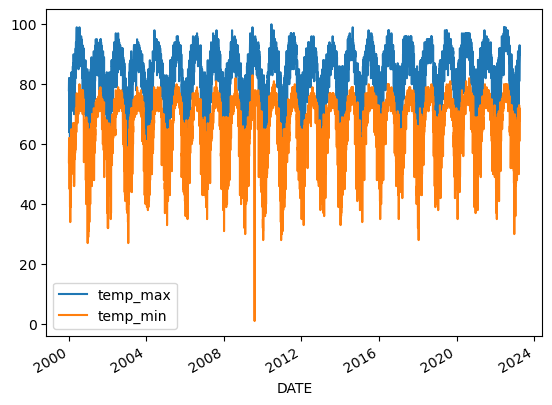

In [27]:
core_weather[["temp_max", "temp_min"]].plot()

In [28]:
core_weather.index.year.value_counts().sort_index()

2000    364
2001    365
2002    365
2003    364
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    365
2023     98
Name: DATE, dtype: int64

<Axes: xlabel='DATE'>

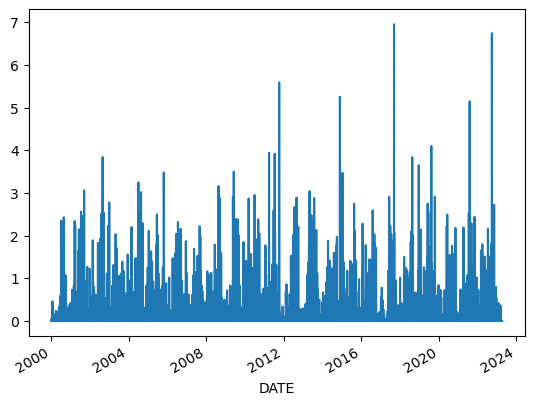

In [29]:
core_weather["precipt"].plot()

<Axes: xlabel='DATE'>

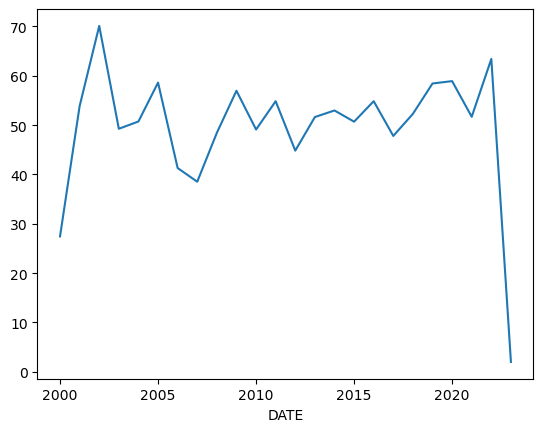

In [30]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precipt"].sum()).plot()

In [31]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [32]:
core_weather

,precipt,temp_max,temp_min,target
DATE,,,,
2000-01-01,0.00,78.0,54.0,79.0
2000-01-02,0.00,79.0,57.0,81.0
2000-01-03,0.01,81.0,55.0,82.0
2000-01-04,0.04,82.0,60.0,64.0
2000-01-05,0.00,64.0,54.0,77.0
...,...,...,...,...
2023-04-04,0.00,93.0,71.0,91.0
2023-04-05,0.00,91.0,70.0,91.0
2023-04-06,0.00,91.0,69.0,91.0


In [33]:
core_weather = core_weather.iloc[:-1,:].copy()

In [34]:
core_weather

,precipt,temp_max,temp_min,target
DATE,,,,
2000-01-01,0.00,78.0,54.0,79.0
2000-01-02,0.00,79.0,57.0,81.0
2000-01-03,0.01,81.0,55.0,82.0
2000-01-04,0.04,82.0,60.0,64.0
2000-01-05,0.00,64.0,54.0,77.0
...,...,...,...,...
2023-04-03,0.00,91.0,72.0,93.0
2023-04-04,0.00,93.0,71.0,91.0
2023-04-05,0.00,91.0,70.0,91.0


In [35]:
from sklearn.linear_model import Ridge
regression = Ridge(alpha=.1)

In [36]:
prediction = ["precipt", "temp_max", "temp_min"]

In [37]:
train_data = core_weather.loc[:"2021-12-31"]

In [39]:
test_data = core_weather.loc["2022-01-01":]

In [40]:
train_data

,precipt,temp_max,temp_min,target
DATE,,,,
2000-01-01,0.00,78.0,54.0,79.0
2000-01-02,0.00,79.0,57.0,81.0
2000-01-03,0.01,81.0,55.0,82.0
2000-01-04,0.04,82.0,60.0,64.0
2000-01-05,0.00,64.0,54.0,77.0
...,...,...,...,...
2021-12-27,0.00,79.0,59.0,82.0
2021-12-28,0.00,82.0,58.0,84.0
2021-12-29,0.00,84.0,63.0,83.0


In [41]:
test_data

,precipt,temp_max,temp_min,target
DATE,,,,
2022-01-01,0.00,85.0,68.0,85.0
2022-01-02,0.00,85.0,69.0,74.0
2022-01-03,0.01,74.0,54.0,77.0
2022-01-04,0.00,77.0,50.0,79.0
2022-01-05,0.00,79.0,58.0,74.0
...,...,...,...,...
2023-04-03,0.00,91.0,72.0,93.0
2023-04-04,0.00,93.0,71.0,91.0
2023-04-05,0.00,91.0,70.0,91.0


In [42]:
regression.fit(train_data[prediction], train_data["target"])

Ridge(alpha=0.1)

In [43]:
pred = regression.predict(test_data[prediction])

In [44]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(test_data["target"], pred)

3.4490924106342664

In [45]:
combined = pd.concat([test_data["target"], pd.Series(pred, index=test_data.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [46]:
combined

,actual,predictions
DATE,,
2022-01-01,85.0,85.018286
2022-01-02,74.0,85.166148
2022-01-03,77.0,75.127328
2022-01-04,79.0,76.672563
2022-01-05,74.0,79.276513
...,...,...
2023-04-03,93.0,89.872882
2023-04-04,91.0,91.146068
2023-04-05,91.0,89.577157


<Axes: xlabel='DATE'>

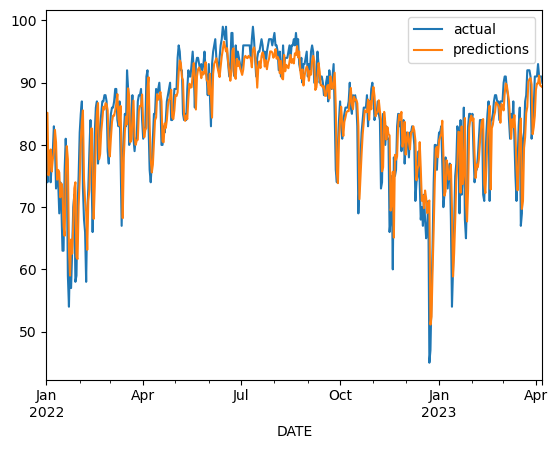

In [47]:
combined.plot()

In [49]:
regression.coef_

array([-0.51126609,  0.71052431,  0.1478627 ])

In [50]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [51]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [52]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [53]:
core_weather = core_weather.iloc[30:,:].copy()

In [54]:
def create_predictions(prediction, core_weather, regression):
    train_data = core_weather.loc[:"2021-12-31"]
    test_data = core_weather.loc["2022-01-01":]

    regression.fit(train_data[prediction], train_data["target"])
    pred = regression.predict(test_data[prediction])

    error = mean_absolute_error(test_data["target"], pred)
    
    combined = pd.concat([test_data["target"], pd.Series(pred, index=test_data.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [57]:
prediction = ["precipt", "temp_max", "temp_min", "month_day_max", "max_min"]

In [58]:
error, combined = create_predictions(prediction, core_weather, regression)

In [59]:
error

3.316561022698358

<Axes: xlabel='DATE'>

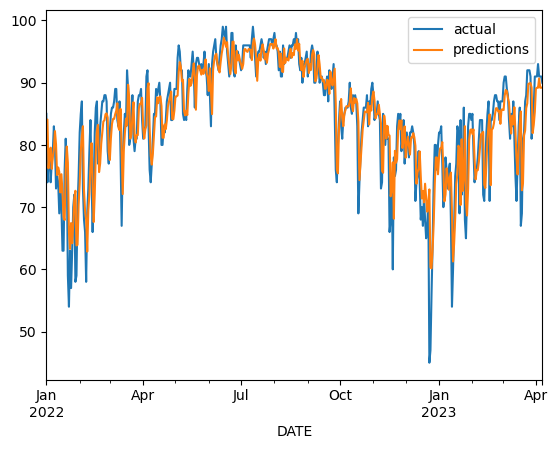

In [60]:
combined.plot()

In [67]:
regression.coef_

array([-8.91804497e-01,  6.80134031e-01,  2.82047840e-03,  5.40993183e+00,
        1.58870693e-02,  2.01021632e-01,  1.12526815e-01])

In [68]:
core_weather.corr()["target"]

precipt            0.074608
temp_max           0.858768
temp_min           0.795739
target             1.000000
month_max          0.762409
month_day_max     -0.411438
max_min           -0.024130
monthly_avg        0.776369
day_of_year_avg    0.797785
Name: target, dtype: float64

In [69]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [70]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2022-12-23,45.0,72.678138,27.678138
2023-03-18,67.0,84.092638,17.092638
2022-01-21,59.0,75.589500,16.589500
2022-11-19,60.0,76.582015,16.582015
2023-01-13,54.0,69.295891,15.295891
2022-10-18,69.0,83.896151,14.896151
2022-11-16,66.0,80.260329,14.260329
2022-01-28,58.0,71.994566,13.994566
2023-01-21,84.0,70.344596,13.655404
